In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Datasets/'

Mounted at /content/gdrive


In [ ]:
print(root_path)
'gdrive/My Drive/Datasets/'

gdrive/My Drive/Datasets/


'gdrive/My Drive/Datasets/'

In [ ]:
dataset_path = '/content/drive/MyDrive/Datasets'  # Adjust this path as needed


In [ ]:
train_data_dir = root_path + "Train"
#gdrive/My Drive/Datasets/COMPLETED DATASETS TTV CLASSES/Train/
valid_data_dir = root_path + "Validation"
#gdrive/My Drive/Datasets/COMPLETED DATASETS TTV CLASSES/Validation/
test_data_dir = root_path + "Test"
#gdrive/My Drive/Datasets/COMPLETED DATASETS TTV CLASSES/Test/


In [ ]:
img_height, img_width = (224,224)
# img_height = 224
# img_width = 224


In [ ]:
batch_size = 200


In [ ]:
epochs_num = 10


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator #


In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input


In [ ]:
 # training ImageDataGenerator
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
width_shift_range=0.3,
fill_mode='reflect',
height_shift_range=0.3,
brightness_range=(0.1, 0.6),
shear_range=45.0,
zoom_range=[0.5, 1.5])
# Generator from Training Directory
train_generator = train_datagen.flow_from_directory(train_data_dir,
target_size=(img_height, img_width),
batch_size=batch_size,
class_mode='categorical',
subset='training')

Found 598 images belonging to 4 classes.


In [ ]:
# validation ImageDataGenerator
valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
width_shift_range=0.3,
fill_mode='reflect',
height_shift_range=0.3,
brightness_range=(0.1, 0.6),
shear_range=45.0,
zoom_range=[0.5, 1.5],
validation_split=0.99)
# Generator from Validation Directory
valid_generator = valid_datagen.flow_from_directory(valid_data_dir,
target_size=(img_height, img_width),
batch_size=batch_size,
class_mode='categorical',
shuffle=False,
subset='validation')#

Found 88 images belonging to 4 classes.


In [ ]:
# testing ImageDataGenerator
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
width_shift_range=0.3,
fill_mode='reflect',
height_shift_range=0.3,
brightness_range=(0.1, 0.6),
shear_range=45.0,
zoom_range=[0.5, 1.5],
validation_split=0.99)


In [ ]:
# Generator from Testing Directory
test_generator = test_datagen.flow_from_directory(test_data_dir,
target_size=(img_height, img_width),
batch_size=batch_size, # dati 1 lang n
class_mode='categorical',
shuffle=False,
subset='validation')

Found 86 images belonging to 4 classes.


In [ ]:
 print('Number of Batches per epoch train=%d, valid=%d ,test=%d' % (len(train_generator), len(train_generator), len(train_generator)))

Number of Batches per epoch train=3, valid=3 ,test=3


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
base_model = ResNet50(input_shape=[img_height, img_width] + [3], weights='imagenet', include_top=False)
#base_model = ResNet50(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
x = base_model.output
from tensorflow.keras.layers import GlobalAveragePooling2D
x = GlobalAveragePooling2D()(x)
## our layers - you can add more if you want
from tensorflow.keras.layers import Flatten
x = Flatten()(base_model.output) #added
from tensorflow.keras.layers import Dense
x = Dense(1024, activation='relu')(x)
from tensorflow.keras.layers import Dropout
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.resnet50 import decode_predictions
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization

from tensorflow.keras.preprocessing import image

from tensorflow.keras.models import Sequential
import numpy as np

In [ ]:
from tensorflow.keras.models import Model
# create a model object
model = Model(inputs=base_model.input, outputs=predictions) #transfer learning model

In [ ]:
# don't train existing weights
for layer in base_model.layers:
    layer.trainable = False # Indented this line to be part of the for loop

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
optimizer='adam',
loss='categorical_crossentropy',
metrics = ['accuracy']
)
# model.compile(optimizer = Adam(learning_rate=0.000001), loss = 'categorical_crossentropy

In [ ]:
# view the structure of the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 126,876,036 (483.99 MB)

 Trainable params: 103,288,324 (394.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
myModel = model.fit(train_generator,epochs = epochs_num,validation_data = valid_generator)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 199s 72s/step - accuracy: 0.4336 - loss: 67.2421 - val_accuracy: 0.4432 - val_loss: 21.5932
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 161s 53s/step - accuracy: 0.3870 - loss: 23.8665 - val_accuracy: 0.6250 - val_loss: 7.9642
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 202s 52s/step - accuracy: 0.5923 - loss: 12.7960 - val_accuracy: 0.6250 - val_loss: 13.0329
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 204s 52s/step - accuracy: 0.5587 - loss: 13.1611 - val_accuracy: 0.6932 - val_loss: 2.7896
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 199s 53s/step - accuracy: 0.6290 - loss: 7.3557 - val_accuracy: 0.8068 - val_loss: 1.1022
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 161s 53s/step - accuracy: 0.6931 - loss: 5.3663 - val_accuracy: 0.7614 - val_loss: 1.9809
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 203s 52s/step - accuracy: 0.7169 - loss: 4.9098 - val_accuracy: 0.7841 - val_loss: 1.2888
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 161s 52s/step - accuracy: 0.7384 - loss: 3.7375 - val_accuracy: 0.8409 - val

In [ ]:
model.save('bubble_answer_model.keras')

Text(0.5, 1.0, 'Accuracy')

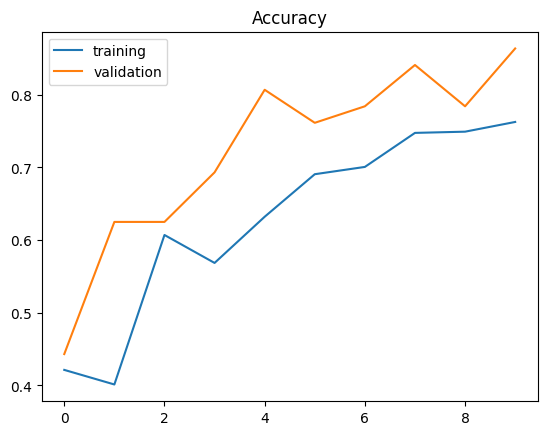

In [ ]:
import matplotlib.pyplot as plt
plt.plot(myModel.history['accuracy'])
plt.plot(myModel.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title("Accuracy")


Text(0.5, 1.0, 'Loss')

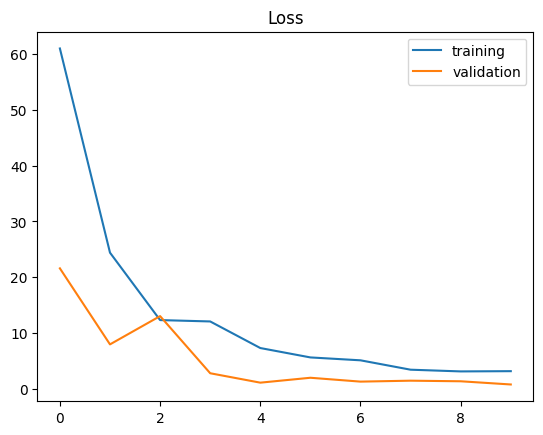

In [ ]:
plt.plot(myModel.history['loss'])
plt.plot(myModel.history['val_loss'])
plt.legend(['training','validation'])
plt.title("Loss")


In [ ]:
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('\nTest accuracy:', test_acc)


1/1 - 19s - 19s/step - accuracy: 0.9070 - loss: 0.5097

Test accuracy: 0.9069767594337463


In [ ]:
model_json = model.to_json()

In [ ]:
# Save the model architecture as JSON
model_json = model.to_json()
with open("gdrive/My Drive/resnet50-10-epocs-model.json", "w") as json_file:
    json_file.write(model_json)  # Ensure this line is indented inside the 'with' block

# Save the model weights in the new .keras format
model.save("gdrive/My Drive/resnet50-10-epocs-model.keras")

print("Saved model architecture and weights to Google Drive")


Saved model architecture and weights to Google Drive
